<a href="https://colab.research.google.com/github/Nourhan-Adell/DeepLearning/blob/main/Fashion_Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## **Implementing  a class that Stop the trianing when I reach a point that I want to be at..**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.4):
      print('\nLoss is low so cancelling training!')
      self.model.stop_training =  True

# Instantiate class
callbacks = myCallback()

**What does this function do?**

Is taht at every epoch, you can callback to the code function, having checked the matrics.
And if they're what you want to say then you can cancel the training at that point.


This includes stopping training when you reach a certain accuracy/loss score, saving your model as a checkpoint after each successful epoch, adjusting the learning rates over time, and more.

**And thus helping in reduce the overfitting problem**

## **Load the Fashion_mnist dataset**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)= fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

This show that the training data has 60000 images in it so we can show anu image between 0 and 59999 and its label.

Label: 9

Image pixel array: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1  

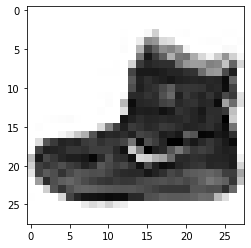

In [ ]:
index = 0

np.set_printoptions(linewidth=320)  #Thus to set the number of characters per row when printing^^
#Print the label and the image
print(f'Label: {train_labels[index]}\n')
print(f'Image pixel array: {train_images[index]}')

#Visualize the image
plt.imshow(train_images[index], cmap='Greys')

Label: 3

Image pixel array: [[  0   0   0   0   0   0   0   0   1   0   0   9   6   0   0   0  24   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  67 209 231 248 252 250 253 246 206 132   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1 227 243 234 234 248 246 238 230 234 250 126   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  57 231 213 227 234 232 231 235 232 218 218 222   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  90 239 207 213 236 235 232 232 229 210 215 207   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 211 245 229 197 220 221 221 222 203 221 235 222  96   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  55 154 239 213 217 218 214 215 215 199 235 167  61   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  17 238 220 221 215 210 249  98   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0 225 2

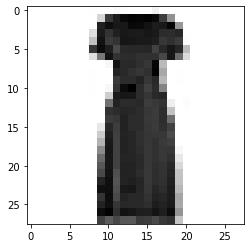

In [ ]:
index = 50

np.set_printoptions(linewidth=320)  #Thus to set the number of characters per row when printing^^
#Print the label and the image
print(f'Label: {train_labels[index]}\n')
print(f'Image pixel array: {train_images[index]}')

#Visualize the image
plt.imshow(train_images[index], cmap='Greys')

# **Normalizing the data:**
The values in the previous print are between (0, 255), so if you are training a neural netwirk specially in image processing, we will need to normalize the data and make it scaled between (0, 1) thus to make the model learn better

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# **Building the classification model:**

Sequential: Is a function that defines the sequence of layers in the neural network

Flatten: converting the data from 2D array(28, 28) into 1D array





In [ ]:
from tensorflow import keras
model = tf.keras.models.Sequential([
    #Specifu=ying the first convolution(we asking keras to generat:
    #64 random filters, each filter is 3 by 3 matrix and the shape is (28, 28) and the extra 1 is just means that
    #we are talling using a single byte for color depth)
    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

This method allows you to inspect the layers of the model, and see the journey of the image through the convolutions

## **Finding the loss function and the optimizer**
**Loss function:** Measure how well or baldly it did. 

**The optimizer:** Is used to generate a new guess and repeate until the loss function will be the optimal one so the model will have the best accuracy

In [ ]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy']
              )
model.fit(train_images, train_labels, epochs =5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.3802 - accuracy: 0.8617
Loss is low so cancelling training!
1875/1875 [==============================] - 86s 45ms/step - loss: 0.3802 - accuracy: 0.8617


#**Evaluate the model:**

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 16ms/step - loss: 0.3377 - accuracy: 0.8778


[0.3376733362674713, 0.8777999877929688]